In [7]:
import datetime
import numpy
import os
from matplotlib import pyplot as plt
import matplotlib
import pandas
from collections import defaultdict

In [8]:
#file path
path = os.path.join(os.path.expanduser('~'), 'Documents', 'TalentGames', 
  'data_analytics','google','google.txt')
file = []
name_table = defaultdict(dict)
coordinates = []
#freq_table = {}
project_list = []
commit_list = []
#frequencies = []
with open(path, encoding='ascii', errors='replace') as s:
  file = s.readlines()

In [9]:
for i in file:
#for i in file[:10000]:
    try:
        line = i.split("\t")
        time_stamp = pandas.to_datetime(line[5])
        year = str(time_stamp.year)
        name = line[3]
    except:
        continue
    if(time_stamp.year == 2017 or time_stamp.year == 2018):
        if(name not in name_table.keys()):
            name_table[name]['commits'] = 0
            name_table[name]['projects'] = set([])
        name_table[name]['commits'] += 1
        name_table[name]['projects'].add(line[1])

In [10]:
for key in name_table.keys():
    size = len(name_table[key]['projects'])
    coordinates.append((size, name_table[key]['commits']))
    #if(size not in freq_table.keys()):
    #    freq_table[size] = 0
    #freq_table[size] += 1
for pair in coordinates:
    if(pair[0] > 5000 or pair[1] > 5000):
        continue
    project_list.append(pair[0])
    commit_list.append(pair[1])
    #frequencies.append(freq_table[key])

No handles with labels found to put in legend.


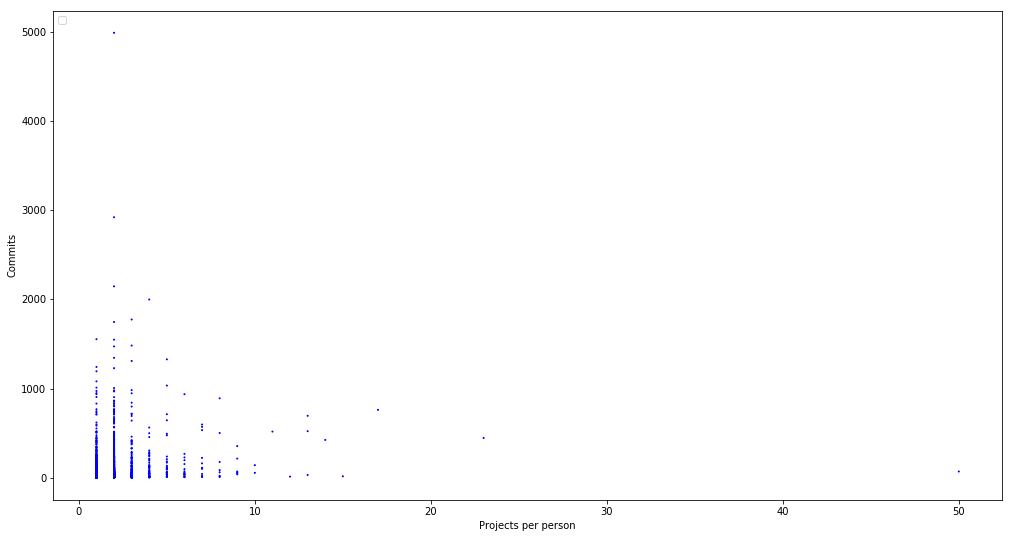

In [11]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 17
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size
s = [1 for n in project_list]

#plt.plot(date_list, commit_list, c="red", alpha=0.5)
plt.scatter(project_list, commit_list, s=s, color="blue")
plt.xlabel("Projects per person")
plt.ylabel("Commits")
plt.legend(loc=2)
plt.show()